In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "../data/tickets_data.csv"
data = pd.read_csv(file_path)

print("\nFirst 5 Rows of the Dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nDataset Describe:")
print(data.describe())

print("\nUnique Values per Column:")
print(data.nunique())


First 5 Rows of the Dataset:
                   Created CancelTime        DepartureTime    BillID  \
0  2022-10-23 09:38:49.110        NaN  2022-11-02 23:59:00  39710203   
1  2022-08-15 14:51:43.160        NaN  2022-08-18 04:15:00  38689463   
2  2022-09-20 17:25:27.250        NaN  2022-09-21 11:00:00  39245173   
3  2022-06-25 11:32:53.980        NaN  2022-06-26 08:30:00  37957585   
4  2022-06-01 11:30:53.633        NaN  2022-06-02 23:00:00  37584530   

    TicketID  ReserveStatus    UserID   Male      Price  CouponDiscount  ...  \
0  1091777.0              5  122885.0   True  6600000.0         34425.0  ...   
1  1070902.0              5  876925.0   True  9500000.0             0.0  ...   
2  7624237.0              3  916640.0  False  2000000.0             0.0  ...   
3  2867547.0              2       NaN  False    40000.0             0.0  ...   
4  7212559.0              3       NaN   True  1130000.0             0.0  ...   

  Domestic              VehicleType  VehicleClass TripRe

## Data Translation

Translate city names from Persian to English

In [50]:
#get all unique values in From & To columns together
unique_locations = pd.unique(data[['From', 'To']].values.ravel('K'))
print(f"\nTotal Unique Locations in 'From' and 'To' columns: {len(unique_locations)}")
print(unique_locations)



Total Unique Locations in 'From' and 'To' columns: 319
['گرگان' 'مشهد' 'شیراز' 'تبریز' 'تهران' 'بروجرد' 'اصفهان' 'یزد' 'رشت'
 'بوشهر' 'اهواز' 'اراک' 'مشهد (خراسان )' 'قم' 'سیرجان' 'کرج' 'آبادان'
 'زنجان' 'بافق' 'شوشتر' 'اردبیل' 'نجف آباد (اصفهان )' 'خرم آباد (لرستان )'
 'بهبهان' 'خرمشهر' 'رودسر' 'چالوس' 'جهرم' 'کیش' 'کرمان' 'قزوین'
 'گنبدکاووس' 'گلپایگان' 'بندرعباس' 'عسلويه' 'جلفا' 'دیر' 'ارومیه' 'زاهدان'
 'کرمانشاه' 'بابلسر' 'کاشمر' 'گرمسار' 'هشتگرد' 'اقلید' 'لنجان' 'همدان'
 'بیرجند' 'شهرکرد' 'مراغه' 'ساری' 'رامسر' 'بروجن' 'قایم شهر' 'جوین'
 'برخوار' 'سنندج' 'طبس' 'ماسال' 'شاهرود' 'سمنان' 'خواف' 'دامغان' 'دورود'
 'اندیمشک' 'شاهرود (سمنان )' 'تنکابن' 'آستارا' 'گناباد' 'لامرد'
 'کنگان (بوشهر)' 'نور' 'نایروبی' 'استانبول' 'چابهار' 'قشم' 'عسلویه'
 'شهرضا' 'ایرانشهر' 'بابل' 'مهاباد (آذربایجان غربی )' 'ملایر' 'زواره'
 'میلان' 'تاکستان' 'خوی' 'محمدیه' 'خرم دره' 'کاشان' 'گناوه' 'دزفول'
 'تویسرکان' 'خلخال' 'سرخس' 'مرند' 'نیشابور' 'بشرویه' 'ایذه' 'حکاری'
 'کازرون' 'ایلام' 'میانه' 'بانه' 'نوشهر'

In [51]:
# The Great City Translation Dictionary
city_map = {
    # --- Major Cities ---
    'تهران': 'Tehran',
    'مشهد': 'Mashhad',
    'مشهد (خراسان )': 'Mashhad',
    'شیراز': 'Shiraz',
    'اصفهان': 'Isfahan',
    'تبریز': 'Tabriz',
    'اهواز': 'Ahvaz',
    'کرج': 'Karaj',
    'قم': 'Qom',
    'کرمانشاه': 'Kermanshah',
    'ارومیه': 'Urmia',
    'رشت': 'Rasht',
    'زاهدان': 'Zahedan',
    'همدان': 'Hamedan',
    'کرمان': 'Kerman',
    'یزد': 'Yazd',
    'اردبیل': 'Ardabil',
    'بندرعباس': 'Bandar Abbas',
    'اراک': 'Arak',
    'قزوین': 'Qazvin',
    'زنجان': 'Zanjan',
    'گرگان': 'Gorgan',
    'ساری': 'Sari',
    'دزفول': 'Dezful',
    'آبادان': 'Abadan',
    'بوشهر': 'Bushehr',
    'بجنورد': 'Bojnurd',
    'خرم آباد (لرستان )': 'Khorramabad',
    'خرم\u200cآباد': 'Khorramabad', 
    'سنندج': 'Sanandaj',
    'ایلام': 'Ilam',
    'یاسوج': 'Yasuj',
    'یاسوج (بویراحمد)': 'Yasuj',
    'شهرکرد': 'Shahr-e Kord',
    'سمنان': 'Semnan',
    'بیرجند': 'Birjand',
    
    # --- Islands & Special Zones ---
    'کیش': 'Kish Island',
    'قشم': 'Qeshm Island',
    'عسلويه': 'Asaluyeh',
    'عسلویه': 'Asaluyeh',
    'چابهار': 'Chabahar',

    # --- International Cities ---
    'استانبول': 'Istanbul',
    'دبی': 'Dubai',
    'نجف': 'Najaf',
    'بغداد': 'Baghdad',
    'پاریس': 'Paris',
    'لندن': 'London',
    'فرانکفورت': 'Frankfurt',
    'میلان': 'Milan',
    'رم': 'Rome',
    'آمستردام': 'Amsterdam',
    'تورنتو': 'Toronto',
    'نیویورک': 'New York',
    'مسکو': 'Moscow',
    'دوحه': 'Doha',
    'آنتالیا': 'Antalya',
    'ازمیر': 'Izmir',
    'آنکارا': 'Ankara',
    'وان': 'Van',
    'دنیزلی': 'Denizli',
    'آدانا': 'Adana',
    'آلانیا': 'Alanya',
    'آغری': 'Agri',
    'حکاری': 'Hakkari',
    'تفلیس': 'Tbilisi',
    'باتومی': 'Batumi',
    'ایروان': 'Yerevan',
    'باکو': 'Baku',
    'کویت': 'Kuwait City',
    'مسقط': 'Muscat',
    'ابوظبی': 'Abu Dhabi',
    'شارجه': 'Sharjah',
    'سلیمانیه': 'Sulaymaniyah',
    'کربلا': 'Karbala',
    'بمبئی': 'Mumbai',
    'چنای': 'Chennai',
    'سیالکوت': 'Sialkot',
    'بانکوک': 'Bangkok',
    'پکن': 'Beijing',
    'توکیو': 'Tokyo',
    'استکهلم': 'Stockholm',
    'گوتنبرگ': 'Gothenburg',
    'کپنهاگ': 'Copenhagen',
    'زوریخ': 'Zurich',
    'هامبورگ': 'Hamburg',
    'ورشو': 'Warsaw',
    'لیسبون': 'Lisbon',
    'فارو': 'Faro',
    'ونیز': 'Venice',
    'فلورانس': 'Florence',
    'کاتانیا': 'Catania',
    'صوفیه': 'Sofia',
    'نایروبی': 'Nairobi',
    'دوربان': 'Durban',
    'مونترآل': 'Montreal',

    # --- Other Iranian Cities ---
    'بروجرد': 'Borujerd',
    'سیرجان': 'Sirjan',
    'بافق': 'Bafq',
    'شوشتر': 'Shushtar',
    'نجف آباد (اصفهان )': 'Najafabad',
    'بهبهان': 'Behbahan',
    'خرمشهر': 'Khorramshahr',
    'رودسر': 'Rudsar',
    'چالوس': 'Chalus',
    'جهرم': 'Jahrom',
    'گنبدکاووس': 'Gonbad-e Kavus',
    'گلپایگان': 'Golpayegan',
    'جلفا': 'Jolfa',
    'دیر': 'Dayyer',
    'بابلسر': 'Babolsar',
    'کاشمر': 'Kashmar',
    'گرمسار': 'Garmsar',
    'هشتگرد': 'Hashtgerd',
    'اقلید': 'Eqlid',
    'لنجان': 'Lenjan',
    'مراغه': 'Maragheh',
    'رامسر': 'Ramsar',
    'بروجن': 'Borujen',
    'قایم شهر': 'Qaem Shahr',
    'قائمشهر': 'Qaem Shahr',
    'جوین': 'Joveyn',
    'برخوار': 'Borkhar',
    'طبس': 'Tabas',
    'ماسال': 'Masal',
    'شاهرود': 'Shahrud',
    'شاهرود (سمنان )': 'Shahrud',
    'خواف': 'Khaf',
    'دامغان': 'Damghan',
    'دورود': 'Dorud',
    'اندیمشک': 'Andimeshk',
    'تنکابن': 'Tonekabon',
    'آستارا': 'Astara',
    'گناباد': 'Gonabad',
    'لامرد': 'Lamerd',
    'کنگان (بوشهر)': 'Kangan',
    'نور': 'Nur',
    'شهرضا': 'Shahreza',
    'ایرانشهر': 'Iranshahr',
    'بابل': 'Babol',
    'مهاباد (آذربایجان غربی )': 'Mahabad',
    'مهاباد': 'Mahabad',
    'ملایر': 'Malayer',
    'زواره': 'Zavareh',
    'تاکستان': 'Takestan',
    'خوی': 'Khoy',
    'محمدیه': 'Mohammadiyeh',
    'خرم دره': 'Khorramdarreh',
    'کاشان': 'Kashan',
    'گناوه': 'Genaveh',
    'تویسرکان': 'Tuyserkan',
    'خلخال': 'Khalkhal',
    'سرخس': 'Sarakhs',
    'مرند': 'Marand',
    'نیشابور': 'Neyshabur',
    'بشرویه': 'Boshruyeh',
    'ایذه': 'Izeh',
    'کازرون': 'Kazerun',
    'میانه': 'Mianeh',
    'بانه': 'Baneh',
    'نوشهر': 'Nowshahr',
    'شاهین شهر': 'Shahin Shahr',
    'آمل': 'Amol',
    'جاجرم': 'Jajarm',
    'فردوس (خراسان )': 'Ferdows',
    'بم': 'Bam',
    'داراب (فارس )': 'Darab',
    'دشتستان': 'Dashtestan',
    'ماهشهر': 'Mahshahr',
    'بوکان': 'Bukan',
    'ازنا': 'Azna',
    'شهریار': 'Shahriar',
    'بندرانزلی': 'Bandar Anzali',
    'سراب (آذربایجان شرقی )': 'Sarab',
    'خمینی شهر': 'Khomeyni Shahr',
    'سقز': 'Saqez',
    'بندر لنگه': 'Bandar Lengeh',
    'بندرلنگه': 'Bandar Lengeh',
    'بافت': 'Baft',
    'آباده': 'Abadeh',
    'شاهین دژ': 'Shahin Dezh',
    'اردکان (یزد)': 'Ardakan',
    'اردکان': 'Ardakan',
    'بهشهر': 'Behshahr',
    'مسجدسلیمان': 'Masjed Soleyman',
    'خراسانک': 'Khorasanak',
    'اسفراین': 'Esfarayen',
    'میبد': 'Meybod',
    'محمودآباد (مازندران )': 'Mahmudabad',
    'تربت حیدریه': 'Torbat-e Heydarieh',
    'قوچان': 'Quchan',
    'نهاوند (همدان )': 'Nahavand',
    'نی ریز': 'Neyriz',
    'زرند': 'Zarand',
    'زرند (کرمان )': 'Zarand',
    'ساوه': 'Saveh',
    'خمین': 'Khomein',
    'خنج': 'Khonj',
    'اسلام آباد غرب': 'Islamabad-e Gharb',
    'رفسنجان': 'Rafsanjan',
    'گچساران': 'Gachsaran',
    'گچساران (دوگنبدان )': 'Gachsaran',
    'ورامین': 'Varamin',
    'جیرفت': 'Jiroft',
    'سلماس': 'Salmas',
    'نقاب': 'Neqab',
    'آزادور': 'Azadvar',
    'شوش': 'Shush',
    'کهگیلویه (دهدشت )': 'Kohgiluyeh',
    'لارستان': 'Larestan',
    'میناب': 'Minab',
    'شهر قدس (قلعه حسن خان)': 'Shahr-e Qods',
    'رباط کریم': 'Robat Karim',
    'پارس آباد': 'Pars abad',
    'زابل': 'Zabol',
    'ماکو': 'Maku',
    'آستانه اشرفیه': 'Astaneh-ye Ashrafiyeh',
    'شبستر': 'Shabestar',
    'لنگرود': 'Langrud',
    'طوالش': 'Talesh',
    'دلفان': 'Delfan',
    'فیروزکوه': 'Firuzkuh',
    'سبزوار': 'Sabzevar',
    'سعادت شهر': 'Saadat Shahr',
    'قرچك': 'Qarchak',
    'پیشوا': 'Pishva',
    'شیروان (خراسان )': 'Shirvan',
    'پاوه': 'Paveh',
    'شهربابک (کرمان )': 'Shahr-e Babak',
    'اهر': 'Ahar',
    'نکا': 'Neka',
    'کوهدشت (لرستان )': 'Kuhdasht',
    'آبیک': 'Abyek',
    'مشگین شهر': 'Meshgin Shahr',
    'سنقر': 'Sonqor',
    'گراش': 'Gerash',
    'مریوان': 'Marivan',
    'بجستان': 'Bajestan',
    'ملکان (ملک کندی )': 'Malekan',
    'عجب شیر': 'Ajab Shir',
    'بادرود': 'Badrud',
    'برداسکن': 'Bardaskan',
    'ایوان': 'Eyvan',
    'جمکران': 'Jamkaran',
    'میاندوآب': 'Miandoab',
    'جاسک': 'Jask',
    'ارجان': 'Arjan',
    'صومعه سرا': 'Someh Sara',
    'عباس آباد(مازندران )': 'Abbasabad',
    'دشتی (بوشهر)': 'Dashti',
    'بهاباد': 'Behabad',
    'سپیددشت': 'Sepid Dasht',
    'اسلامشهر': 'Islamshahr',
    'لار (فارس )': 'Lar',
    'تفرش': 'Tafresh',
    'نایین': 'Nain',
    'لاهیجان (گیلان )': 'Lahijan',
    'مهران (ایلام )': 'Mehran',
    'خوانسار': 'Khansar',
    'گیلانغرب': 'Gilan-e Gharb',
    'سمیرم': 'Semirom',
    'محلات': 'Mahallat',
    'ابهر': 'Abhar',
    'قاینات (قاین )': 'Qaen',
    'دشت آزادگان': 'Dasht-e Azadegan',
    'قلعه گنج': 'Ghaleye Ganj',
    'جم': 'Jam',
    'شیرگاه': 'Shirgah',
    'کلاله': 'Kalaleh',
    'الیگودرز': 'Aligudarz',
    'پیرانشهر': 'Piranshahr',
    'ری': 'Rey',
    'نطنز': 'Natanz',
    'دهلران': 'Dehloran',
    'قروه': 'Qorveh',
    'ارسنجان': 'Arsanjan',
    'اردستان': 'Ardestan',
    'قصرشیرین': 'Qasr-e Shirin',
    'فومن': 'Fuman',
    'کنگاور (کرمانشاه )': 'Kangavar',
    'ابرکوه (ابرقو)': 'Abarkuh',
    'ممسنی': 'Mamasani',
    'پلدختر': 'Pol-e Dokhtar',
    'فسا': 'Fasa',
    'منوجان (کرمان )': 'Manujan',
    'پارسیان': 'Parsian',
    'بیجار': 'Bijar',
    'دیلم': 'Deylam',
    'گرمی': 'Germi',
    'نیک شهر': 'Nik Shahr',
    'دیواندره': 'Divandarreh',
    'دره شهر': 'Darreh Shahr',
    'تربت جام': 'Torbat-e Jam',
    'نقده': 'Naqadeh',
    'مهدی شهر': 'Mehdishahr',
    'خاش': 'Khash',
    'آشتیان': 'Ashtian',
    'امیدیه (خوزستان )': 'Omidiyeh',
    'پل سفید': 'Pol-e Sefid',
    'پاسارگاد': 'Pasargad',
    'آبدانان': 'Abdanan',
    'سرایان': 'Sarayan',
    'دلیجان': 'Delijan',
    'اسد آباد(همدان )': 'Asadabad',
    'مهر (فارس)': 'Mohr',
    'سردشت (آذربایجان غربی )': 'Sardasht',
    'کهنوج': 'Kahnuj',
    'قیروکارزین': 'QiroKarzin',
    'مهریز': 'Mehriz',
    'سلسله': 'Selseleh',
    'خرم بید': 'Khorrambid',
    'شوط': 'Showt',
    'استهبان': 'Estahban',
    'دهگلان': 'Dehgolan',
    'بناب (آذربایجان شرقی )': 'Bonab',
    'سراوان (سیستان و بلوچستان )': 'Saravan',
    'رامهرمز': 'Ramhormoz',
    'خور(اصفهان)': 'Khur',
    'بندر ترکمن': 'Bandar Torkaman',
    'رزن': 'Razan',
    'فریدونشهر': 'Fereydunshahr',
    'چالدران': 'Chaldoran',
    'جوانرود': 'Javanrud',
    'عنبرآباد': 'Anbarabad',
}

# Apply the mapping
data['From'] = data['From'].map(city_map).fillna(data['From'])
data['To'] = data['To'].map(city_map).fillna(data['To'])

# Check for anything missed
print("Missed Cities in From:", data[~data['From'].isin(city_map.values())]['From'].unique())
print("Missed Cities in To:", data[~data['To'].isin(city_map.values())]['To'].unique())


print("\nFirst 5 Rows of the Dataset:")
print(data.head())

Missed Cities in From: []
Missed Cities in To: []

First 5 Rows of the Dataset:
                   Created CancelTime        DepartureTime    BillID  \
0  2022-10-23 09:38:49.110        NaN  2022-11-02 23:59:00  39710203   
1  2022-08-15 14:51:43.160        NaN  2022-08-18 04:15:00  38689463   
2  2022-09-20 17:25:27.250        NaN  2022-09-21 11:00:00  39245173   
3  2022-06-25 11:32:53.980        NaN  2022-06-26 08:30:00  37957585   
4  2022-06-01 11:30:53.633        NaN  2022-06-02 23:00:00  37584530   

    TicketID  ReserveStatus    UserID   Male      Price  CouponDiscount  ...  \
0  1091777.0              5  122885.0   True  6600000.0         34425.0  ...   
1  1070902.0              5  876925.0   True  9500000.0             0.0  ...   
2  7624237.0              3  916640.0  False  2000000.0             0.0  ...   
3  2867547.0              2       NaN  False    40000.0             0.0  ...   
4  7212559.0              3       NaN   True  1130000.0             0.0  ...   

  Dome

## Feature Engineering

### Missing Values

In [52]:
missing_info = pd.DataFrame({
    'Missing Count': data.isnull().sum(),
    'Missing Percentage': (data.isnull().sum() / len(data)) * 100
})

print(missing_info.sort_values(by='Missing Percentage', ascending=False))

                      Missing Count  Missing Percentage
HashPassportNumber_p         100155           99.146678
CancelTime                    85691           84.828296
UserID                        58474           57.885306
HashEmail                     57933           57.349753
VehicleClass                  38450           38.062900
VehicleType                    7544            7.468050
ReserveStatus                     0            0.000000
TicketID                          0            0.000000
BillID                            0            0.000000
DepartureTime                     0            0.000000
Created                           0            0.000000
CouponDiscount                    0            0.000000
Price                             0            0.000000
Male                              0            0.000000
Domestic                          0            0.000000
To                                0            0.000000
From                              0            0

Remove useless columns

In [53]:
#remove HashPassportNumber_p, UserID, HashEmail, BillID, BuyerMobile,TicketID, CancelTime columns
data = data.drop(columns=['HashPassportNumber_p', 'UserID', 'HashEmail', 'BillID', 'BuyerMobile', 'TicketID', 'CancelTime'])

print("\nFirst 5 Rows of the Dataset:")
print(data.head())



First 5 Rows of the Dataset:
                   Created        DepartureTime  ReserveStatus   Male  \
0  2022-10-23 09:38:49.110  2022-11-02 23:59:00              5   True   
1  2022-08-15 14:51:43.160  2022-08-18 04:15:00              5   True   
2  2022-09-20 17:25:27.250  2022-09-21 11:00:00              3  False   
3  2022-06-25 11:32:53.980  2022-06-26 08:30:00              2  False   
4  2022-06-01 11:30:53.633  2022-06-02 23:00:00              3   True   

       Price  CouponDiscount     From         To  Domestic  \
0  6600000.0         34425.0   Gorgan     Tehran         1   
1  9500000.0             0.0  Mashhad     Tehran         1   
2  2000000.0             0.0   Shiraz      Ahvaz         1   
3    40000.0             0.0   Tabriz      Jolfa         1   
4  1130000.0             0.0   Tehran  Najafabad         1   

               VehicleType VehicleClass TripReason Vehicle  Cancel  \
0                      NaN        False       Work   Plane       0   
1                 

Handling Missing Values

In [54]:
# VehicleType: Small missing %,  drop those rows
data = data.dropna(subset=['VehicleType'])

# VehicleClass: Too many missing, so we label them 'Unknown'
data['VehicleClass'] = data['VehicleClass'].fillna('Unknown')

# Convert strings to datetime objects first
data['Created'] = pd.to_datetime(data['Created'])
data['DepartureTime'] = pd.to_datetime(data['DepartureTime'])

# Create "LeadTime" (How many days in advance did they book?)
data['LeadTime_Days'] = (data['DepartureTime'] - data['Created']).dt.total_seconds() / 86400

# drop the original date columns
data = data.drop(columns=['Created']) 

# We want to know: "Is this user a high-risk person?"
# We calculate the mean cancellation rate for each NationalCode
user_stats = data.groupby('NationalCode')['Cancel'].agg(['mean', 'count']).reset_index()
user_stats.columns = ['NationalCode', 'User_Cancel_Rate', 'User_Total_Tickets']

# Merge this info back into the main dataset
data = data.merge(user_stats, on='NationalCode', how='left')

# NOW, we drop the NationalCode. The model will look at 'User_Cancel_Rate' instead.
data = data.drop(columns=['NationalCode'])

### Binary Encoding
There are some features with 2 unique values, but have different types (string, bool). For consistency and easier future management, we turn them all in integers.

In [55]:
data['Male'] = data['Male'].astype(int)

data['TripReason'] = data['TripReason'].map({'Work': 1, 'Int': 0})

### DepartureTime feature extraction

We look for a pattern in month, day of the week and day of the month of `DepartureTime`, to determine which information to retain.

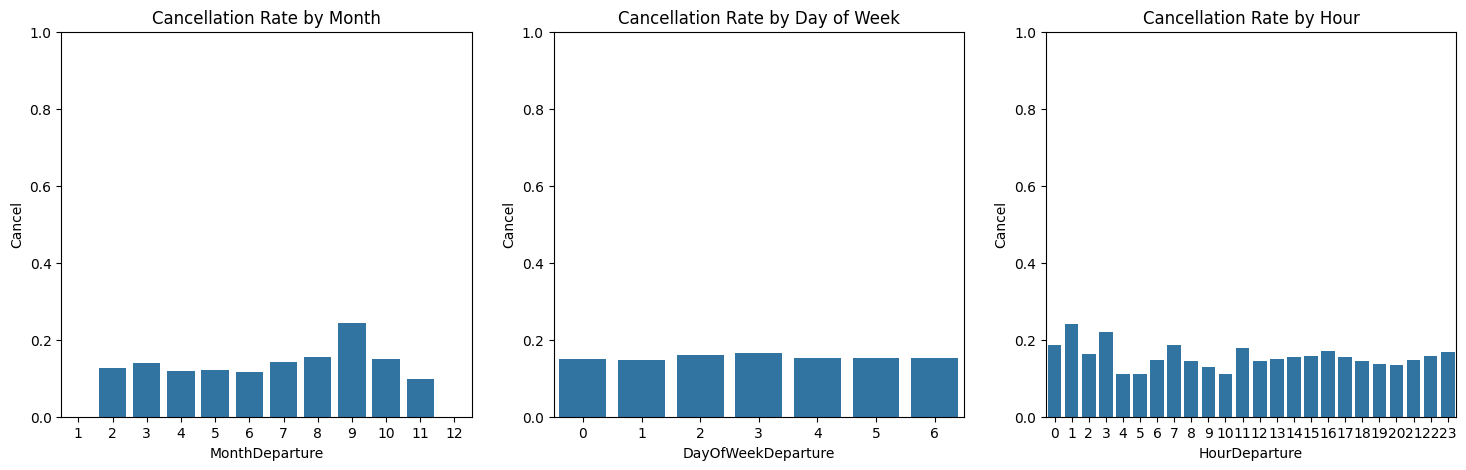

In [56]:
# Extract DepartureTime features
data['MonthDeparture'] = data['DepartureTime'].dt.month
data['DayOfWeekDeparture'] = data['DepartureTime'].dt.dayofweek
data['HourDeparture'] = data['DepartureTime'].dt.hour

# Plot Cancel Rate vs Feature
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Month
sns.barplot(x='MonthDeparture', y='Cancel', data=data, ax=axes[0], errorbar=None)
axes[0].set_title('Cancellation Rate by Month')
axes[0].set_ylim(0, 1) # Fix y-axis to see true scale

# Plot Day of Week
sns.barplot(x='DayOfWeekDeparture', y='Cancel', data=data, ax=axes[1], errorbar=None)
axes[1].set_title('Cancellation Rate by Day of Week')
axes[1].set_ylim(0, 1)

# Plot Hour
sns.barplot(x='HourDeparture', y='Cancel', data=data, ax=axes[2], errorbar=None)
axes[2].set_title('Cancellation Rate by Hour')
axes[2].set_ylim(0, 1)

plt.show()

Results:
- Month - keep: there is a spike in Month 9 (September), where the cancellation rate nearly doubles compared to Month 11
- DayOfWeek - drop: this plot is almost perfectly flat, this feature adds no value.
- Hour - keep: there is a visible pattern, night hours 0-3 (midnight to 3 AM) have higher cancellation rates compared to the safer hours of 5–10 AM.

In [57]:
# Drop the original column
data = data.drop(columns=['DepartureTime', 'DayOfWeekDeparture'])

# Final Dataset

In [58]:
#FINAL CHECK
print(data.isnull().sum())
print("\nRemaining Columns:", data.columns.tolist())

print("\nDataset Info:")
print(data.info())

ReserveStatus         0
Male                  0
Price                 0
CouponDiscount        0
From                  0
To                    0
Domestic              0
VehicleType           0
VehicleClass          0
TripReason            0
Vehicle               0
Cancel                0
LeadTime_Days         0
User_Cancel_Rate      0
User_Total_Tickets    0
MonthDeparture        0
HourDeparture         0
dtype: int64

Remaining Columns: ['ReserveStatus', 'Male', 'Price', 'CouponDiscount', 'From', 'To', 'Domestic', 'VehicleType', 'VehicleClass', 'TripReason', 'Vehicle', 'Cancel', 'LeadTime_Days', 'User_Cancel_Rate', 'User_Total_Tickets', 'MonthDeparture', 'HourDeparture']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93473 entries, 0 to 93472
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ReserveStatus       93473 non-null  int64  
 1   Male                93473 non-null  int64  


In [59]:
print(data.head())

   ReserveStatus  Male      Price  CouponDiscount      From         To  \
0              3     0  2000000.0             0.0    Shiraz      Ahvaz   
1              2     0    40000.0             0.0    Tabriz      Jolfa   
2              3     1  1130000.0             0.0    Tehran  Najafabad   
3              3     1   940000.0         60000.0  Borujerd     Tehran   
4              5     1  9289000.0             0.0    Tehran     Shiraz   

   Domestic              VehicleType VehicleClass  TripReason Vehicle  Cancel  \
0         1                  VIP 2+1         True           1     Bus       0   
1         1          3 ستاره اتوبوسي      Unknown           0   Train       0   
2         1  اسکانیا تک صندلی ۳۱نفره         True           0     Bus       0   
3         1  VIP 25 نفره مانیتور دار         True           1     Bus       0   
4         1                 فوکر 100        False           1   Plane       0   

   LeadTime_Days  User_Cancel_Rate  User_Total_Tickets  MonthDepartu